In [1]:
###Importing required libraries
import pandas as pd
import numpy as no
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [2]:
###Reading dataset

data = pd.read_csv("C:\\Users\\Himanshu\\Downloads\\problem_2_garfield_activity.csv")
data.head()

,8AM,9AM,10AM,11AM,Noon,1PM,2PM,3PM,4PM,5PM,Commute,DayOfWeek,WatchTV
0,Coffee,6,7,2,Sandwich,10,8,4,Tea,10,Long,Mon,Yes
1,Doughnut,4,5,3,Lenthils,1,1,3,PingPong,7,Short,Tue,No
2,Coffee,7,4,4,Taco,10,4,3,PingPong,7,Short,Wed,No
3,Coffee,1,1,8,Sandwich,10,7,6,PingPong,8,Short,Thu,Yes
4,Doughnut,8,6,7,Sandwich,7,6,8,Tea,8,Long,Fri,Yes


In [3]:
###exploring dataset
print("Shape of the dataset is",data.shape)

Shape of the dataset is (21, 13)


In [4]:
###Check null values in the datatset
data.isnull().sum()

8AM          0
9AM          0
10AM         0
11AM         0
Noon         0
1PM          0
2PM          0
3PM          0
4PM          0
5PM          0
Commute      0
DayOfWeek    0
WatchTV      2
dtype: int64

In [5]:
###Drop null values
data.dropna(inplace = True)
print("Shape of data is", data.shape)

Shape of data is (19, 13)


In [6]:
##egregating object type and numeric type attributes
obj_col = ['8AM','Noon','4PM','Commute','DayOfWeek','WatchTV']
num_col = ['9AM','10AM','11AM','1PM','2PM','3PM','5PM']

data_obj = data[obj_col]
data_num = data[num_col]

In [7]:
##Label encoder for encoding categorical attributes
le = LabelEncoder()
data_obj_lencoded = data_obj.apply(le.fit_transform)
data_obj_lencoded.head()

,8AM,Noon,4PM,Commute,DayOfWeek,WatchTV
0,0,1,2,0,1,1
1,1,0,1,1,4,0
2,0,2,1,1,5,0
3,0,1,1,1,3,1
4,1,1,2,0,0,1


In [8]:
###Adding encoded attributes with numeric attributes of the data
df = pd.DataFrame()
df = pd.concat([data_obj_lencoded,data_num], axis = 1)
df.head()

,8AM,Noon,4PM,Commute,DayOfWeek,WatchTV,9AM,10AM,11AM,1PM,2PM,3PM,5PM
0,0,1,2,0,1,1,6,7,2,10,8,4,10
1,1,0,1,1,4,0,4,5,3,1,1,3,7
2,0,2,1,1,5,0,7,4,4,10,4,3,7
3,0,1,1,1,3,1,1,1,8,10,7,6,8
4,1,1,2,0,0,1,8,6,7,7,6,8,8


In [9]:
###Segregating target variables and independent variables for the model input
y = df['WatchTV']
X = df.drop('WatchTV', axis = 1)

In [10]:
###Instantiate random forest model and fitting data to the model
rf=RandomForestClassifier(random_state=10,criterion = "entropy",n_estimators = 20,oob_score = True)
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=20, oob_score=True,
                       random_state=10)

In [11]:
###Important Features of the model
feat_importance = pd.Series(rf.feature_importances_, index=X.columns.to_list())
feat_importance = feat_importance.sort_values(ascending = False)

In [12]:
###OOB score for validation od model. This is the best OOB score achieved due to very less sample training data
print(rf.oob_score_)

0.6842105263157895


In [13]:
feat_importance

2PM          0.209486
Commute      0.136938
1PM          0.110723
Noon         0.103201
4PM          0.087183
5PM          0.083355
9AM          0.075597
DayOfWeek    0.066276
3PM          0.043655
11AM         0.033346
10AM         0.032828
8AM          0.017412
dtype: float64

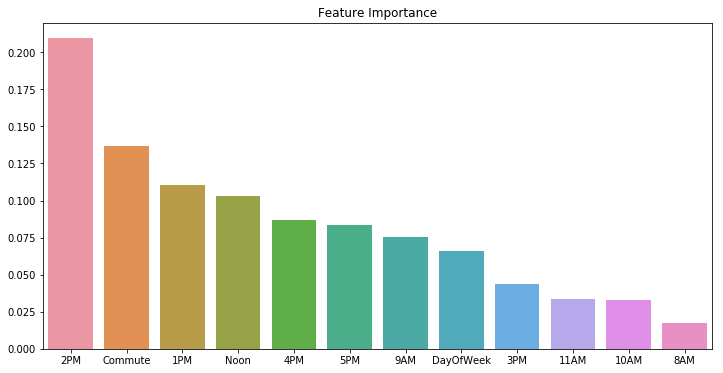

In [14]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Feature Importance")
sns.barplot(x = feat_importance.index, y =  feat_importance)
plt.show()

Top 5 leading indicators of Garfield's TV propensity

1. 2PM 
2. Commute
3. 1PM
4. Noon
5. 4PM